<a href="https://colab.research.google.com/github/justmexmehak/HousingPrices/blob/main/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tabular Data - Group of cells organized into rows and columns

What is Tidy Data?
* Each row corresponds to a single observation in the dataset.
* Each column corresponds to a feature of each observation.
* Each cell contains only one value


In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('https://github.com/justmexmehak/HousingPrices/raw/main/data/mexico-real-estate-1.csv', encoding= 'latin1')
df2 = pd.read_csv('https://github.com/justmexmehak/HousingPrices/raw/main/data/mexico-real-estate-2.csv', encoding= 'latin1')
df3 = pd.read_csv('https://github.com/justmexmehak/HousingPrices/raw/main/data/mexico-real-estate-3.csv', encoding= 'latin1')

In [4]:
print(df1.shape, df2.shape, df3.shape)
df1 = df1.drop(df1.columns[0], axis=1)
df2 = df2.drop(df2.columns[0], axis=1)
df3 = df3.drop(df3.columns[0], axis=1)
print(df1.shape, df2.shape, df3.shape)

(700, 7) (700, 7) (700, 6)
(700, 6) (700, 6) (700, 5)


Clean df1

Problems:
* Many rows with NaN in "lat" and "lon"
* "price_usd" is object, should be float

In [5]:
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_usd      700 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 32.9+ KB
None


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [6]:
df1.dropna(inplace = True) # inplace changes the same dataframe

df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    int64  
 5   price_usd      583 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 31.9+ KB


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
5,house,Yucatán,21.052583,-89.538639,205,"$105,191.37"


In [7]:
df1["price_usd"] = (
    df1["price_usd"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "")
    .astype(float)
)
# replaces $ sign with empty string, regex False ensures that it does not match the regex pattern $ and instead considers the character $
# replace ',' with empty string
# recast as type float
# .str allows us to apply string operations on dataframe
df1["price_usd"].head()

0     67965.56
1     63223.78
2     84298.37
3     94308.80
5    105191.37
Name: price_usd, dtype: float64

Clean df2

Problems:
* NaN values in "lat" and "lon"
* "price_mxn" not "price_usd"


In [8]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_mxn      700 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 32.9+ KB


,property_type,state,lat,lon,area_m2,price_mxn
0,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,apartment,Puebla,NaN,NaN,190,2500000
2,house,Morelos,23.634501,-102.552788,360,5300000
3,house,Morelos,NaN,NaN,76,820000
4,house,Puebla,NaN,NaN,200,1100000


In [9]:
df2.dropna(inplace=True)
# 19 pesos : 1 Dollar (rate in 2014)
df2['price_usd'] = (df2['price_mxn'] / 19).round(2)
df2.drop(columns = ["price_mxn"], inplace = True)

df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  571 non-null    object 
 1   state          571 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        571 non-null    int64  
 5   price_usd      571 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 31.2+ KB


,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72,68421.05
2,house,Morelos,23.634501,-102.552788,360,278947.37
6,apartment,Estado de México,19.272040,-99.572013,85,65789.47
7,house,San Luis Potosí,22.138882,-100.996510,158,111578.95
8,apartment,Distrito Federal,19.394558,-99.129707,65,39904.74


Clean df3

Problems:
* "lat-lon" instead of seperate "lat" and "lon"
* "place_with_parent_names" instead of "state"

In [10]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    int64  
 4   price_usd                700 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 27.5+ KB


,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [11]:
df3.dropna(inplace=True)
df3[["lat", "lon"]] = df3["lat-lon"].str.split(',', expand=True)
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 699
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            582 non-null    object 
 1   place_with_parent_names  582 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  582 non-null    int64  
 4   price_usd                582 non-null    float64
 5   lat                      582 non-null    object 
 6   lon                      582 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 36.4+ KB


,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728


In [12]:
df3['state'] = df3['place_with_parent_names'].str.split('|', expand=True)[2]
df3.drop(columns = ['place_with_parent_names', 'lat-lon'], inplace=True)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  582 non-null    object 
 1   area_m2        582 non-null    int64  
 2   price_usd      582 non-null    float64
 3   lat            582 non-null    object 
 4   lon            582 non-null    object 
 5   state          582 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.8+ KB


,property_type,area_m2,price_usd,lat,lon,state
0,apartment,71,48550.59,19.52589,-99.151703,Distrito Federal
1,house,233,168636.73,19.2640539,-99.5727534,Estado de México
2,house,300,86932.69,19.268629,-99.671722,Estado de México
4,apartment,84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,175,102763.00,20.689157,-103.366728,Jalisco


In [13]:
# Concatenating Data Frames

df = pd.concat([df1, df2, df3])
df.shape
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37


In [14]:
df.to_csv('mexico-real-estate-clean.csv')

## Exploratory Data Analysis (EDA)

EDA is used to get a feel for your data by summarizing it's main characteristics using descriptive statistics and data viusalization.

In [15]:
import matplotlib.pyplot as plt
import plotly.express as px

In [16]:
# In a Mapbox scatter plot, each row of data_frame is represented by a symbol mark on a Mapbox map.

fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},
    width = 600,
    height = 600,
    hover_data = ["price_usd"]
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [17]:
# total no. of unique states
print(df["state"].nunique())

print(df["state"].unique())

df["state"].value_counts().head(10)

30
['Estado de México' 'Nuevo León' 'Guerrero' 'Yucatán' 'Querétaro'
 'Morelos' 'Chiapas' 'Tabasco' 'Distrito Federal' 'Nayarit' 'Puebla'
 'Veracruz de Ignacio de la Llave' 'Sinaloa' 'Tamaulipas' 'Jalisco'
 'San Luis Potosí' 'Baja California' 'Hidalgo' 'Quintana Roo' 'Sonora'
 'Chihuahua' 'Baja California Sur' 'Zacatecas' 'Aguascalientes'
 'Guanajuato' 'Durango' 'Tlaxcala' 'Colima' 'Oaxaca' 'Campeche']


state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: count, dtype: int64

In [18]:
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


Considering the area_m2 column, we observe that the mean value is much larger than the median.

There are more houses at the lower end of the distribution (50 - 200m2) than at the higher end (250 - 400m2) explaining the difference between the mean and the median.


Text(0.5, 1.0, 'Distribution of Home Sizes')

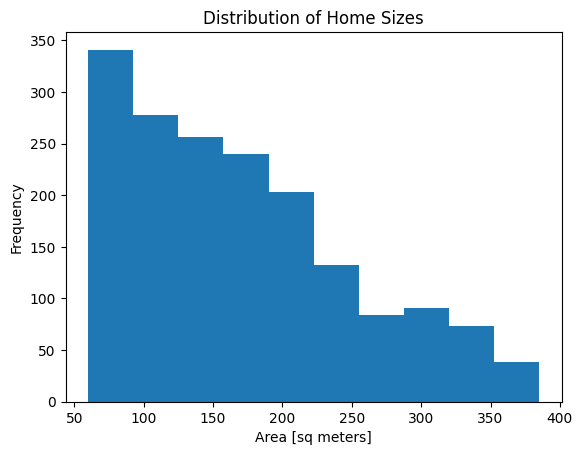

In [19]:
# creating a histogram for area_m2

plt.hist(df["area_m2"])

plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes")

Text(0.5, 1.0, 'Distribution of Home Sizes')

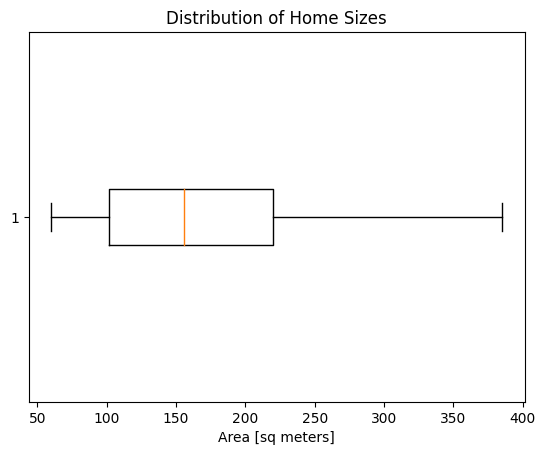

In [20]:
# creating a box plot for area_m2
# the line starts from the min value and goes up to the max value
# the left side of the box represents the 25th percentile
# the right side represents the 75th percentile
# and the orange line represents the median or 50th percentile

plt.boxplot(df["area_m2"], vert=False);
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes")

Text(0.5, 1.0, 'Distribution of Home Prices')

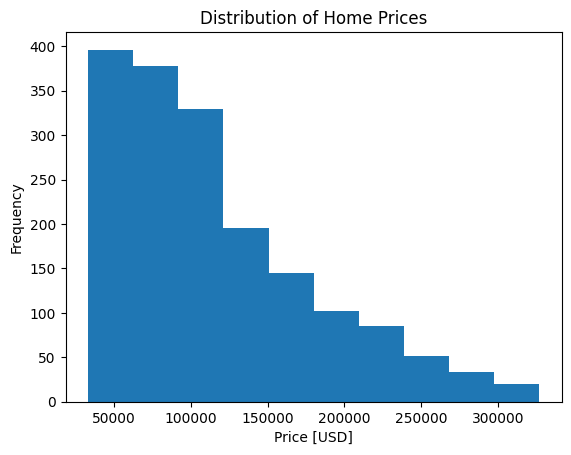

In [21]:
# creating a histogram for area_m2

plt.hist(df["price_usd"])

plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices")

Text(0.5, 1.0, 'Distribution of Home Prices')

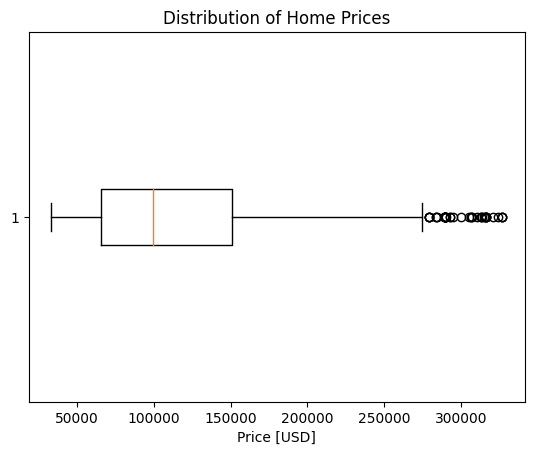

In [22]:
# The circles after the max line represent outliers
# Outliers are values that fall more than 3 standard deviations from the mean

plt.boxplot(df["price_usd"], vert=False)
plt.xlabel("Price [USD]")
plt.title("Distribution of Home Prices")

In [23]:
# We are using groupby to get the mean price per state to
# observe whether housing prices vary by state

mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)

print(mean_price_by_state.shape)
mean_price_by_state.head()



(30,)


state
Querétaro           133955.913281
Guanajuato          133277.965833
Nuevo León          129221.985663
Distrito Federal    128347.267426
Quintana Roo        128065.416053
Name: price_usd, dtype: float64

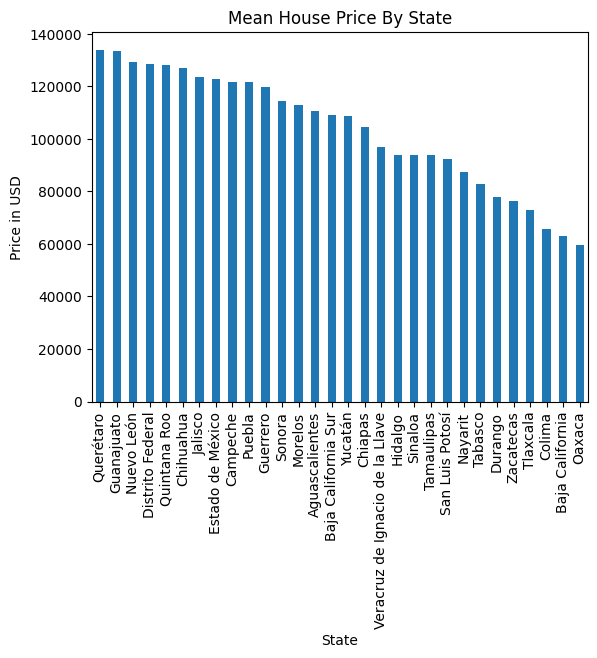

In [24]:
# Creating a bar chart for mean_price_by_state

mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel = "Price in USD",
    title = "Mean House Price By State"
);

In [25]:
# A better metric is price per m2 compared to simply price

# Creating a new column price per m2 in the df
df["price_per_m2"] = df["price_usd"] / df["area_m2"]

df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
5,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


In [26]:
mean_price_per_m2 = df.groupby("state")["price_per_m2"].mean().sort_values(ascending = False)
mean_price_per_m2.head()

state
Distrito Federal    1175.889150
Estado de México     763.753422
Guerrero             761.557206
Jalisco              743.568107
Quintana Roo         736.455284
Name: price_per_m2, dtype: float64

<Axes: title={'center': 'Mean House Price per m2 by State'}, xlabel='State', ylabel='Mean Price per M^2 [USD]'>

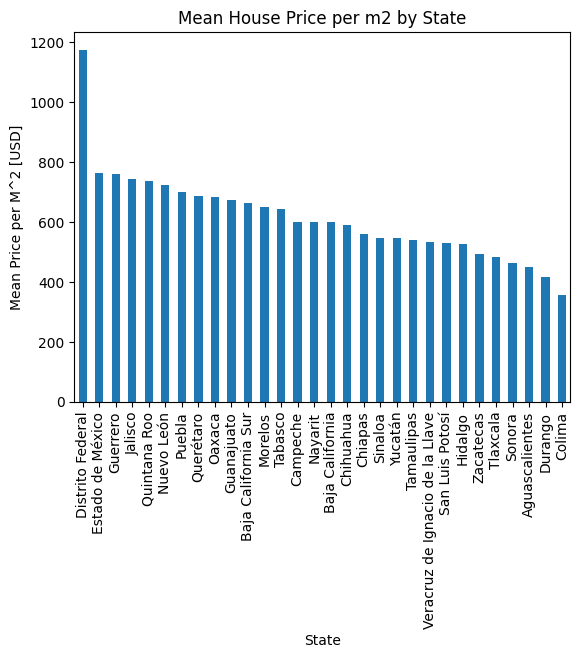

In [27]:
mean_price_per_m2.plot(
    kind="bar",
    xlabel="State",
    ylabel="Mean Price per M^2 [USD]",
    title= "Mean House Price per m2 by State"
)

To observe relationship between 2 features for e.g price and size we can make a scatter plot

We can observe that they are strongly related in some states like Morelos but not in others like Distrito Federal.

That might be because their various other factors having a larger effect in the Capital.

Text(0.5, 1.0, 'Price vs. Area')

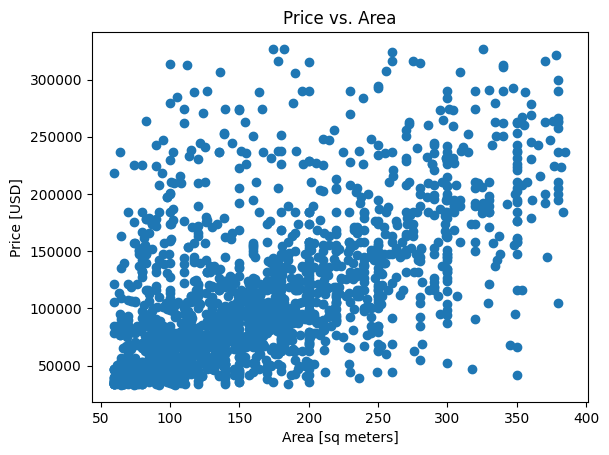

In [28]:
plt.scatter(x=df["area_m2"], y=df["price_usd"]);
plt.ylabel("Price [USD]")
plt.xlabel("Area [sq meters]")
plt.title("Price vs. Area")

In [29]:
# Pearson correlation for "area_m2" and "price_usd"
p_correlation = df["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.585518245323206


In [30]:
df_morelos = df[df["state"] == "Morelos"]

print(df_morelos.shape)
df_morelos.head()

(160, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
9,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
12,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
21,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
60,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
66,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623


Text(0.5, 1.0, 'Morelos: Price vs. Area')

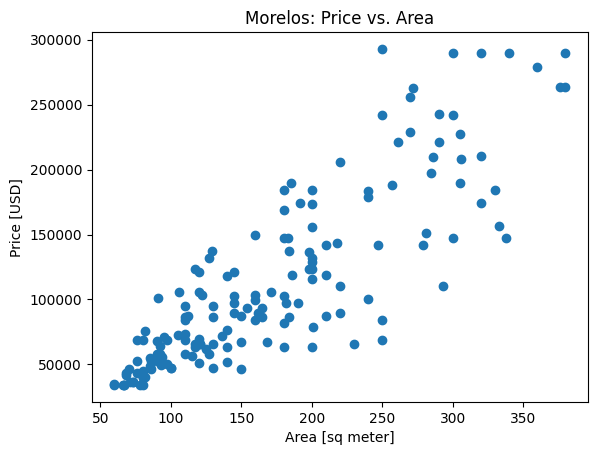

In [31]:
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])

plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")

plt.title("Morelos: Price vs. Area")

In [32]:
df_morelos["area_m2"].corr(df_morelos["price_usd"])

0.8498077608713708

Text(0.5, 1.0, 'Distrito Federal: Price vs. Area')

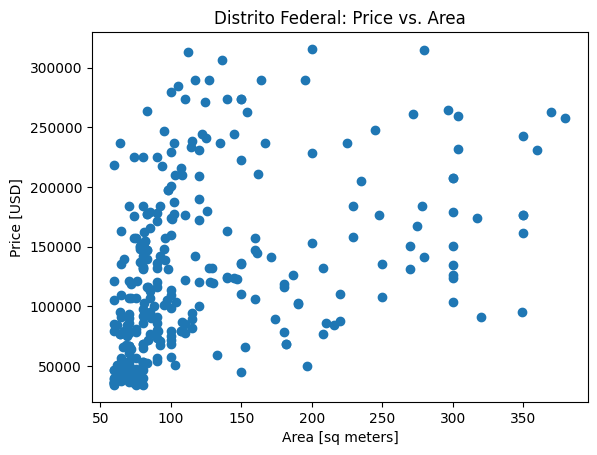

In [33]:
df_mexico_city = df[df["state"] == "Distrito Federal"]

plt.scatter(x = df_mexico_city["area_m2"], y=df_mexico_city["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Distrito Federal: Price vs. Area")

In [34]:
df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])

0.41070392130717864

# Housing Prices in Brazil

First import the 2 data sets and clean the data

DF1 problems:
* null values
* "lat-lon" instead of seperate "lat" and "lon"
* Price as string rather than float
* State missing

DF2 problems:
* null values
* price in brl rather than usd

Next, EDA

* scatter_mapbox to show location of properties in df
* Summary Statistics for Area and Price
* Histogram to show Distribution of Home Prices
* Box Plot to show Distribution of Home Sizes
* Extract Series to show mean price by region
* Make Bar Chart to display mean price by region
* Make a seperate df for region South and use value counts to see the states and their number of properties in the South region
* Make a Scatter Plot to show relation between Price and Area for the state with the largest no. of properties in the South Region
* Find correlation between Price and Area for all states in the south region


In [35]:
df1 = pd.read_csv('https://github.com/justmexmehak/HousingPrices/raw/main/data/brazil-real-estate-1.csv')
df2 = pd.read_csv('https://github.com/justmexmehak/HousingPrices/raw/main/data/brazil-real-estate-2.csv')
df1.shape, df2.shape

((12834, 6), (12833, 7))

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
dtypes: float64(1), object(5)
memory usage: 601.7+ KB


In [37]:
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            11551 non-null  object 
 1   place_with_parent_names  11551 non-null  object 
 2   region                   11551 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  11551 non-null  float64
 5   price_usd                11551 non-null  object 
dtypes: float64(1), object(5)
memory usage: 631.7+ KB


In [38]:
df1[["lat", "lon"]] = df1["lat-lon"].str.split(",", expand=True).astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            11551 non-null  object 
 1   place_with_parent_names  11551 non-null  object 
 2   region                   11551 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  11551 non-null  float64
 5   price_usd                11551 non-null  object 
 6   lat                      11551 non-null  float64
 7   lon                      11551 non-null  float64
dtypes: float64(3), object(5)
memory usage: 812.2+ KB


In [39]:
df1["state"] = df1["place_with_parent_names"].str.split("|", expand=True)[2]
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85",-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37",-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45",-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20",-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71",-9.654955,-35.700227,Alagoas


In [40]:
df1["price_usd"] = df1["price_usd"].str.replace("$", "", regex=False).str.replace(",", "").astype(float)

In [41]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            11551 non-null  object 
 1   place_with_parent_names  11551 non-null  object 
 2   region                   11551 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  11551 non-null  float64
 5   price_usd                11551 non-null  float64
 6   lat                      11551 non-null  float64
 7   lon                      11551 non-null  float64
 8   state                    11551 non-null  object 
dtypes: float64(4), object(5)
memory usage: 902.4+ KB


,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,81133.37,-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,101416.71,-9.654955,-35.700227,Alagoas


In [42]:
df1.drop(columns=["lat-lon", "place_with_parent_names"], inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  11551 non-null  object 
 1   region         11551 non-null  object 
 2   area_m2        11551 non-null  float64
 3   price_usd      11551 non-null  float64
 4   lat            11551 non-null  float64
 5   lon            11551 non-null  float64
 6   state          11551 non-null  object 
dtypes: float64(4), object(3)
memory usage: 721.9+ KB


In [43]:
df2.info()
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
dtypes: float64(4), object(3)
memory usage: 701.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 11293 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  11293 non-null  object 
 1   state          11293 non-null  object 
 2   region         11293 non-null  object 
 3   lat            11293 non-null  float64
 4   lon            11293 non-null  float64
 5   area_m2        11293 non-n

In [44]:
# at the time of data collection 1 usd = 3.19 brl
df2["price_usd"] = df2["price_brl"] / 3.19
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36,145495.097179


In [45]:
df2.drop(columns=["price_brl"], inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11293 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  11293 non-null  object 
 1   state          11293 non-null  object 
 2   region         11293 non-null  object 
 3   lat            11293 non-null  float64
 4   lon            11293 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_usd      11293 non-null  float64
dtypes: float64(4), object(3)
memory usage: 705.8+ KB


In [46]:
df = pd.concat([df1, df2])
df.shape

(22844, 7)

In [47]:
fig = px.scatter_mapbox(
    df,
    lat = "lat",
    lon = "lon",
    center = {"lat": -14.2, "lon": -51.9},
    width = 600,
    height = 600,
    hover_data = ["price_usd"]
)

fig.update_layout(mapbox_style = "open-street-map")
fig.show()

In [48]:
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315480
std,47.742932,103617.682978
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.880878
max,252.000000,525659.717868


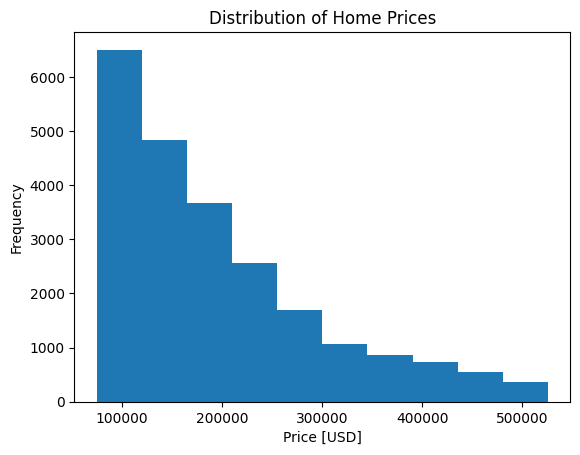

In [49]:
plt.hist(df["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices")

plt.savefig('dist.png', dpi = 150)

Text(0.5, 1.0, 'Distribution of Home Sizes')

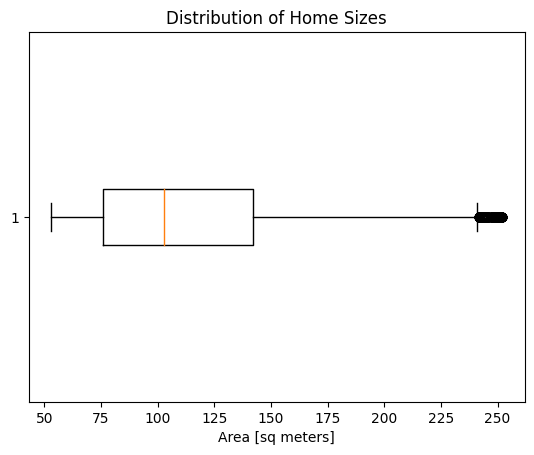

In [50]:
plt.boxplot(df["area_m2"], vert=False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes")

In [51]:
mean_price_by_region = df.groupby("region")["price_usd"].mean().sort_values()

In [52]:
mean_price_by_region

region
Central-West    178596.283663
North           181308.958207
Northeast       185422.985441
South           189012.345265
Southeast       208996.762778
Name: price_usd, dtype: float64

<Axes: title={'center': 'Mean Home Price By Region'}, xlabel='Region', ylabel='Mean Price [USD]'>

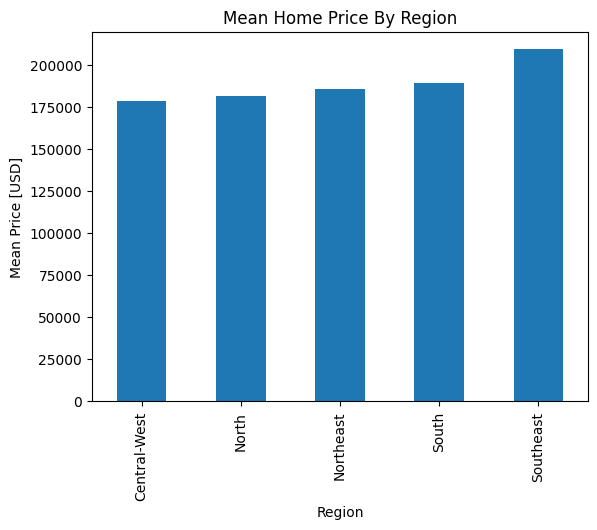

In [53]:
mean_price_by_region.plot(
    kind = "bar",
    xlabel = "Region",
    ylabel = "Mean Price [USD]",
    title = "Mean Home Price By Region",
)

In [54]:
df_south = df[df['region'] == 'South']

In [55]:
df_south.head()
homes_by_state = df_south['state'].value_counts()
homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

Text(0.5, 1.0, 'Rio Grande do Sul: Price vs. Area')

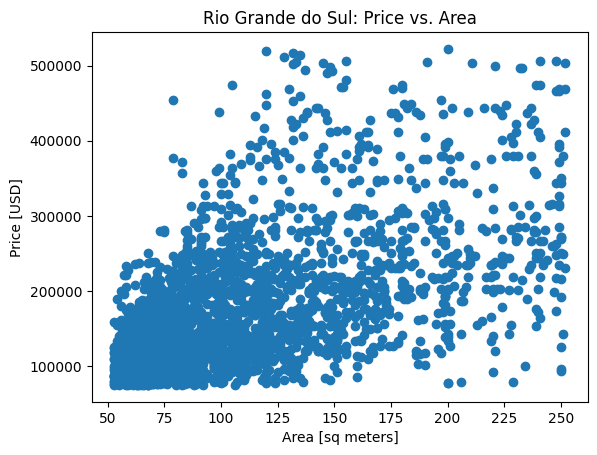

In [56]:
df_rgds = df_south[df_south['state'] == 'Rio Grande do Sul']
plt.scatter(x = df_rgds["area_m2"], y = df_rgds["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Rio Grande do Sul: Price vs. Area")

In [57]:
south_states_corr = {}
for state in df_south['state'].unique():
  df_temp = df_south[df_south['state'] == state]
  south_states_corr[state] = df_temp['area_m2'].corr(df_temp['price_usd'])

south_states_corr

{'Paraná': 0.5436659935502661,
 'Rio Grande do Sul': 0.5773267433717683,
 'Santa Catarina': 0.506812177636678}

# Housing in Buenos Aires

Predicting Housing Prices in Buenos Aries, Argentina

* How to create a linear regression model using the scikit-learn library
* How to build a data pipeline for imputing missing values and encoding categorical features (imputation - replacing missing values with substitute ones)
* How to improve model performance by reducing overfitting.
* How to create a dynamic dashboard for interacting with your completed model.

Data wrangling is the process of transforming raw data into more usable formats for analysis.

1. Preparing Data
  * Import
  * Explore
  * Split
2. Building Model
  * Baseline - Get an idea of the mininmum level of performance your model needs to achieve
  * Iterate - build a model, train, evaluate, and repeat until you're happy with it's performance
  * Evaluate
3. Communicating Results

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [59]:
def wrangle(path):
  '''
  Read CSV file into DataFrame
  input -> file path
  output -> DataFrame
  '''

  df = pd.read_csv(path, encoding = 'latin1', sep=';')
  df = df.drop(df.columns[0], axis=1)

  mask_cf = df['place_with_parent_names'].str.contains("Capital Federal")
  mask_apt = df['property_type'] == 'apartment'
  mask_price = df['price_aprox_usd'] < 400000

  df = df[mask_cf & mask_apt & mask_price]

  low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
  mask_area = df['surface_covered_in_m2'].between(low, high)
  df = df[mask_area]

  return df

In [60]:
help(wrangle)

Help on function wrangle in module __main__:

wrangle(path)
    Read CSV file into DataFrame
    input -> file path
    output -> DataFrame



In [61]:
df1 = wrangle('https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-1.csv')
print(df1.shape)

(1343, 16)


In [62]:
df1.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constituci?n|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [63]:
assert(len(df1) <= 8606)

* we are only observing properties that are in Capital Federal
* we want the ones which cost less than $400,000
* we only want apartments

In [64]:
# Mask to extract properties in Capital Federal
mask_cf = df1['place_with_parent_names'].str.contains("Capital Federal")
df1[mask_cf].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constituci?n|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [65]:
# Extracting apartments
mask_apt = df1['property_type'] == 'apartment'
df1[mask_apt].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 4 to 8604
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1343 non-null   object 
 1   property_type               1343 non-null   object 
 2   place_with_parent_names     1343 non-null   object 
 3   lat-lon                     1300 non-null   object 
 4   price                       1343 non-null   float64
 5   currency                    1343 non-null   object 
 6   price_aprox_local_currency  1343 non-null   float64
 7   price_aprox_usd             1343 non-null   float64
 8   surface_total_in_m2         965 non-null    float64
 9   surface_covered_in_m2       1343 non-null   float64
 10  price_usd_per_m2            927 non-null    float64
 11  price_per_m2                1343 non-null   float64
 12  floor                       379 non-null    float64
 13  rooms                       1078 non-n

In [66]:
# Extracting properties that cost less than $400,000
mask_price = df1['price_aprox_usd'] < 400_000
df1[mask_price].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constituci?n|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


Text(0.5, 1.0, 'Distribution of Apartment Sizes')

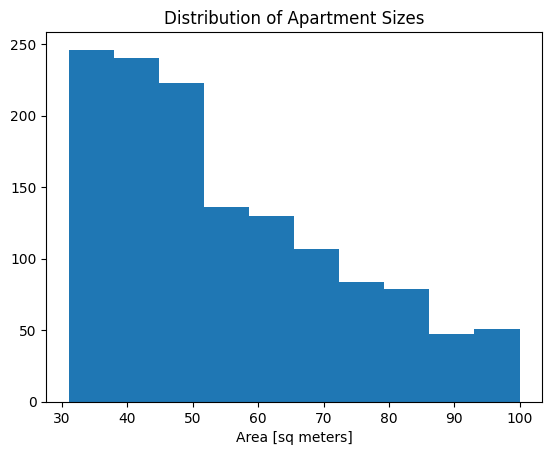

In [67]:
plt.hist(df1['surface_covered_in_m2']);
plt.xlabel("Area [sq meters]")
plt.title('Distribution of Apartment Sizes')

In [68]:
df1.describe()['surface_covered_in_m2']

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

In [69]:
 # we can see that the data is really skewed and has outliers and we know this because the min value is 0
 # and you don't sell properties of size 0. On the other hand, the max is 62034,
 # where as 75% of the properties are around 73m2.
 # Moreover the mean is only 97, but the standard deviation around that mean is 1500

# Extracting all the observations that fall between the 0.1 and 0.9 quantiles
# for 'surface_covered_in_m2' in order to clip the extremes from our data

low, high = df1['surface_covered_in_m2'].quantile([0.1, 0.9])
print(low, high)
mask_area = df1['surface_covered_in_m2'].between(low, high)
df1[mask_area].info()

35.0 84.0
<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 4 to 8604
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1092 non-null   object 
 1   property_type               1092 non-null   object 
 2   place_with_parent_names     1092 non-null   object 
 3   lat-lon                     1060 non-null   object 
 4   price                       1092 non-null   float64
 5   currency                    1092 non-null   object 
 6   price_aprox_local_currency  1092 non-null   float64
 7   price_aprox_usd             1092 non-null   float64
 8   surface_total_in_m2         788 non-null    float64
 9   surface_covered_in_m2       1092 non-null   float64
 10  price_usd_per_m2            754 non-null    float64
 11  price_per_m2                1092 non-null   float64
 12  floor                       314 non-null    float64
 13  rooms                       

Text(0.5, 1.0, 'Buenos Aires: Price vs. Area')

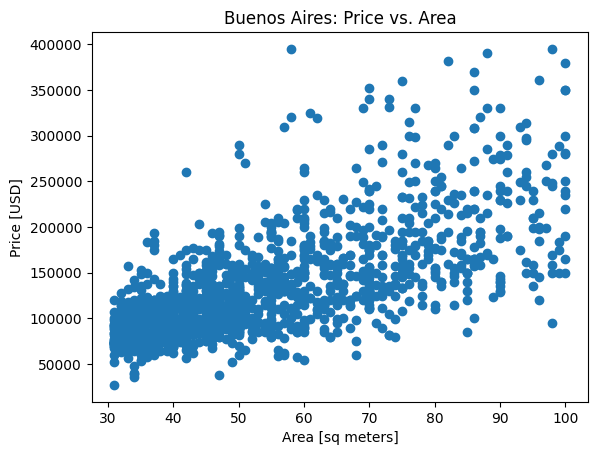

In [70]:
plt.scatter(x=df1['surface_covered_in_m2'], y=df1['price_aprox_usd'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]')
plt.title('Buenos Aires: Price vs. Area')

In [71]:
df1['surface_covered_in_m2'].corr(df1['price_aprox_usd'])

0.6868188329865074

## Linear Model

Feature Matrix (2+ dimensions) , Target Vector (1 dimensional)

Feature - Apartment Size

Target - Price USD

To build the model first we split our data into features and target

Then we determine a baseline - our model needs to perform better than this. It's a model that makes only one prediction.

For our baseline we use the mean house price. It predicts the same price regardless of house size.


In [72]:
X_train = df1[['surface_covered_in_m2']]
X_train.shape

(1343, 1)

In [73]:
y_train = df1['price_aprox_usd']
y_train.shape

(1343,)

In [74]:
y_mean = sum(y_train) / len(y_train)
y_mean

135527.83871928512

In [75]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[135527.83871928512,
 135527.83871928512,
 135527.83871928512,
 135527.83871928512,
 135527.83871928512]

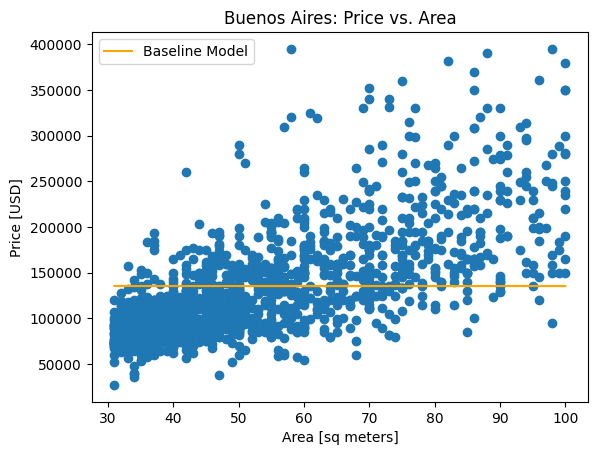

In [76]:
plt.plot(X_train, y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

In [77]:
mae_baseline = mean_absolute_error(y_pred_baseline, y_train)
round(mae_baseline, 2)

# This tells us that our model needs to have an error less than 45199.46 to be useful

45199.46

In [78]:
# Instantiate Model
model = LinearRegression()

In [79]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

In [81]:
mae_training = mean_absolute_error(y_pred_training, y_train)
round(mae_training, 2)

31248.26

In [82]:
intercept = round(model.intercept_, 2)
coefficient = round(model.coef_[0], 2)
print(f'y = {coefficient}x + {intercept}')

y = 2253.12x + 11433.31


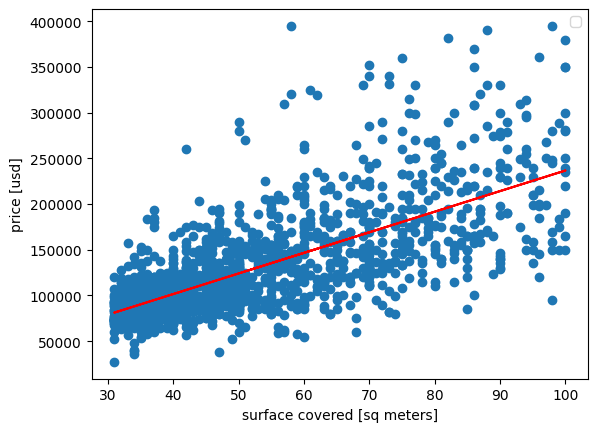

In [83]:
plt.plot(X_train, y_pred_training, color="red")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();

# Predicting Price with Location

Features: Location - lat and lon

In [84]:
import numpy as np
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer # impute missing values
from sklearn.pipeline import Pipeline, make_pipeline # use components to build your model

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 4 to 8604
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1343 non-null   object 
 1   property_type               1343 non-null   object 
 2   place_with_parent_names     1343 non-null   object 
 3   lat-lon                     1300 non-null   object 
 4   price                       1343 non-null   float64
 5   currency                    1343 non-null   object 
 6   price_aprox_local_currency  1343 non-null   float64
 7   price_aprox_usd             1343 non-null   float64
 8   surface_total_in_m2         965 non-null    float64
 9   surface_covered_in_m2       1343 non-null   float64
 10  price_usd_per_m2            927 non-null    float64
 11  price_per_m2                1343 non-null   float64
 12  floor                       379 non-null    float64
 13  rooms                       1078 non-n

In [86]:
def wrangle2(path):
  '''
  Read CSV file into DataFrame
  input -> file path
  output -> DataFrame
  '''

  df = pd.read_csv(path, encoding = 'latin1', sep=';')

  if df.columns[0] == 'Unnamed: 0':
    df = df.drop(df.columns[0], axis=1)

  mask_cf = df['place_with_parent_names'].str.contains("Capital Federal")
  mask_apt = df['property_type'] == 'apartment'
  mask_price = df['price_aprox_usd'] < 400000

  df = df[mask_cf & mask_apt & mask_price]

  low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
  mask_area = df['surface_covered_in_m2'].between(low, high)
  df = df[mask_area]

  # Splitting 'lat-lon' column into 'lat' and 'lon' with type float
  df[['lat', 'lon']] = df['lat-lon'].str.split(',', expand=True).astype(float)
  df.drop(columns = ['lat-lon'], inplace = True)

  return df

In [87]:
frame1 = wrangle2('https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-1.csv')
print(frame1.shape)
frame1.info()

(1343, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 4 to 8604
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1343 non-null   object 
 1   property_type               1343 non-null   object 
 2   place_with_parent_names     1343 non-null   object 
 3   price                       1343 non-null   float64
 4   currency                    1343 non-null   object 
 5   price_aprox_local_currency  1343 non-null   float64
 6   price_aprox_usd             1343 non-null   float64
 7   surface_total_in_m2         965 non-null    float64
 8   surface_covered_in_m2       1343 non-null   float64
 9   price_usd_per_m2            927 non-null    float64
 10  price_per_m2                1343 non-null   float64
 11  floor                       379 non-null    float64
 12  rooms                       1078 non-null   float64
 13  expenses                   

In [88]:
frame2 = wrangle2('https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-2.csv')
print(frame2.shape)
frame2.info()

(1315, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 1315 entries, 2 to 8585
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1315 non-null   object 
 1   property_type               1315 non-null   object 
 2   place_with_parent_names     1315 non-null   object 
 3   price                       1315 non-null   float64
 4   currency                    1315 non-null   object 
 5   price_aprox_local_currency  1315 non-null   float64
 6   price_aprox_usd             1315 non-null   float64
 7   surface_total_in_m2         933 non-null    float64
 8   surface_covered_in_m2       1315 non-null   float64
 9   price_usd_per_m2            891 non-null    float64
 10  price_per_m2                1315 non-null   float64
 11  floor                       390 non-null    float64
 12  rooms                       1059 non-null   float64
 13  expenses                   

In [89]:
dfx = pd.read_csv('https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-1.csv', encoding='latin-1', sep=';')

dfx.columns

dfx.columns[0] == 'Unnamed: 0'

True

In [90]:
# Ignore index because both frames have random indexes
df = pd.concat([frame1, frame2], ignore_index = True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   2658 non-null   object 
 1   property_type               2658 non-null   object 
 2   place_with_parent_names     2658 non-null   object 
 3   price                       2658 non-null   float64
 4   currency                    2658 non-null   object 
 5   price_aprox_local_currency  2658 non-null   float64
 6   price_aprox_usd             2658 non-null   float64
 7   surface_total_in_m2         1898 non-null   float64
 8   surface_covered_in_m2       2658 non-null   float64
 9   price_usd_per_m2            1818 non-null   float64
 10  price_per_m2                2658 non-null   float64
 11  floor                       769 non-null    float64
 12  rooms                       2137 non-null   float64
 13  expenses                    688 n

,operation,property_type,place_with_parent_names,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon
0,sell,apartment,|Argentina|Capital Federal|Chacarita|,129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...,-34.584651,-58.454693
1,sell,apartment,|Argentina|Capital Federal|Villa Luro|,87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...,-34.638979,-58.500115
2,sell,apartment,|Argentina|Capital Federal|Caballito|,118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...,-34.615847,-58.459957
3,sell,apartment,|Argentina|Capital Federal|Constituci?n|,57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...,-34.625222,-58.382382
4,sell,apartment,|Argentina|Capital Federal|Once|,90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...,-34.610610,-58.412511


In [91]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat= 'lat',
    lon= 'lon',
    width=600,  # Width of map
    height=600,  # Height of map
    color= 'price_aprox_usd',
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [92]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x= 'lat',
    y= 'lon',
    z= 'price_aprox_usd',
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

In [93]:
X_train = df[['lon', 'lat']]
y_train = df['price_aprox_usd']

In [94]:
y_mean = sum(y_train) / len(y_train)
y_mean

134732.9734048155

In [95]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[134732.9734048155,
 134732.9734048155,
 134732.9734048155,
 134732.9734048155,
 134732.9734048155]

In [96]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 134732.97
Baseline MAE: 45422.75


In [97]:
# lat and lon have missing values
# We can't train a model with null values
# Simply dropping rows with missing values isn't ideal,
# because models perform better when they have more data
# Instead, we can fill in these missing values using
# information from the whole column - Imputation

# Different strategies are used for imputation
# For e.g filling missing values with mean of column

imputer = SimpleImputer()

In [98]:
imputer.fit(X_train)

SimpleImputer()

In [99]:
XT_train = imputer.transform(X_train)
pd.DataFrame(XT_train, columns=X_train.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     2658 non-null   float64
 1   lat     2658 non-null   float64
dtypes: float64(2)
memory usage: 41.7 KB


In [100]:
model = make_pipeline(
    SimpleImputer(),
    LinearRegression()
)

# can have as many transformers you want in your pipeline,
# but there can only be one predictor and that too at the end of the pipeline


In [101]:
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [102]:
y_pred_training = model.predict(X_train)

In [103]:
mae_training = mean_absolute_error(y_train, y_pred_training)
mae_training

42962.72485842019

In [104]:
model.named_steps

{'simpleimputer': SimpleImputer(), 'linearregression': LinearRegression()}

In [105]:
intercept = model.named_steps['linearregression'].intercept_
coefficients = model.named_steps['linearregression'].coef_
intercept, coefficients

(38113587.05164884, array([196709.41663632, 765466.57502018]))

In [106]:
print(f'price = {round(intercept)} + ({round(coefficients[0])} * longitude) + ({round(coefficients[1])} * latitude)')

price = 38113587 + (196709 * longitude) + (765467 * latitude)


In [107]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x= 'lon',
    y= 'lat',
    z= 'price_aprox_usd',
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Create x and y coordinates for model representation
x_plane = np.linspace(df["lon"].min(), df["lon"].max(), 10)
y_plane = np.linspace(df["lat"].min(), df["lat"].max(), 10)
xx, yy = np.meshgrid(x_plane, y_plane)

# Use model to predict z coordinates
z_plane = model.predict(pd.DataFrame({"lon": x_plane, "lat": y_plane}))
zz = np.tile(z_plane, (10, 1))

# Add plane to figure
fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

# Predicting Price with Neighbourhood

(Categorical Data)

One - Hot Encoding

Overfitting

Regularization: Ridge Regression




In [108]:
! pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.1 MB/s eta 0:00:00


In [109]:
from glob import glob
from category_encoders import OneHotEncoder
from sklearn.linear_model import Ridge

In [110]:
# files = glob("data/buenos-aires-real-estate-*.csv")
# files

files = [
    'https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-1.csv',
    'https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-2.csv',
    'https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-3.csv',
    'https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-4.csv',
    'https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-5.csv'
]
files

['https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-1.csv',
 'https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-2.csv',
 'https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-3.csv',
 'https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-4.csv',
 'https://github.com/justmexmehak/HousingPrices/raw/main/data/buenos-aires-real-estate-5.csv']

In [111]:
def wrangle3(path):
  '''
  Read CSV file into DataFrame
  input -> file path
  output -> DataFrame
  '''

  df = pd.read_csv(path, encoding = 'latin1', sep=';')

  if df.columns[0] == 'Unnamed: 0':
    df = df.drop(df.columns[0], axis=1)

  mask_cf = df['place_with_parent_names'].str.contains("Capital Federal")
  mask_apt = df['property_type'] == 'apartment'
  mask_price = df['price_aprox_usd'] < 400000

  df = df[mask_cf & mask_apt & mask_price]

  low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
  mask_area = df['surface_covered_in_m2'].between(low, high)
  df = df[mask_area]

  # Splitting 'lat-lon' column into 'lat' and 'lon' with type float
  df[['lat', 'lon']] = df['lat-lon'].str.split(',', expand=True).astype(float)
  df.drop(columns = ['lat-lon'], inplace = True)

  df['neighborhood'] = df['place_with_parent_names'].str.split('|', expand=True)[3]
  df.drop(columns=['place_with_parent_names'], inplace = True)

  return df

In [112]:
frames = []
for file in files:
  frames.append(wrangle3(file))
len(frames)

5

In [113]:
df = pd.concat(frames, ignore_index = True)
df.head()

,operation,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon,neighborhood
0,sell,apartment,129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...,-34.584651,-58.454693,Chacarita
1,sell,apartment,87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...,-34.638979,-58.500115,Villa Luro
2,sell,apartment,118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...,-34.615847,-58.459957,Caballito
3,sell,apartment,57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...,-34.625222,-58.382382,Constituci?n
4,sell,apartment,90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...,-34.610610,-58.412511,Once


In [114]:
df.shape

(6582, 17)

In [115]:
target = "price_aprox_usd"
features = ["neighborhood"]
y_train = df[target]
X_train = df[features]

In [116]:
y_mean = sum(y_train) / len(y_train)
y_pred_baseline = [y_mean] * len(y_train)
print("Mean apt price:", y_mean)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Baseline MAE:", mae_baseline)

Mean apt price: 132383.83701458527
Baseline MAE: 44860.10834274134


In [117]:
X_train['neighborhood'].value_counts()

neighborhood
Palermo                 664
Belgrano                552
Caballito               494
Villa Crespo            404
Villa Urquiza           378
Almagro                 341
Flores                  298
Nu?ez                   246
Balvanera               224
Barrio Norte            194
Saavedra                175
San Telmo               173
Recoleta                146
San Cristobal           144
Barracas                136
Colegiales              121
Boedo                   110
Villa Luro              105
Monserrat               104
Congreso                101
Floresta                 99
Villa del Parque         99
Villa Devoto             88
Boca                     85
                         82
Once                     82
Paternal                 58
Centro / Microcentro     56
Coghlan                  54
Villa Pueyrred?n         53
Parque Patricios         50
San Nicol?s              48
Mataderos                47
Puerto Madero            46
Liniers                  46
Parque 

At this point if we try to use Linear Regression predictor on our training data it will raise a Value Error since our data has strings. We need to encode the information and represent it numerically

In [121]:
ohe = OneHotEncoder(use_cat_names = True)
ohe.fit(X_train)
XT_train = ohe.transform(X_train)
print(XT_train.shape)
XT_train.head()


(6582, 57)


,neighborhood_Chacarita,neighborhood_Villa Luro,neighborhood_Caballito,neighborhood_Constituci?n,neighborhood_Once,neighborhood_Almagro,neighborhood_Palermo,neighborhood_Flores,neighborhood_Belgrano,neighborhood_Liniers,...,neighborhood_Puerto Madero,neighborhood_Agronom?a,neighborhood_Monte Castro,neighborhood_Tribunales,neighborhood_Villa Santa Rita,neighborhood_Velez Sarsfield,neighborhood_Villa Soldati,neighborhood_Villa Real,neighborhood_Pompeya,neighborhood_Catalinas
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This will convert our data from something like this

  | Neighborhood

0 | Floresta

1 | Chacarita

2 | Floresta

to this:

Index | Floresta | Chacarita |

0     |    1     |    0      |

1     |    0     |    1      |

2     |    1     |    0      |

On - Off Switches

In [122]:
model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighborhood'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [123]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 39339.7


In [124]:
intercept = model.named_steps['linearregression'].intercept_
coefficients = model.named_steps['linearregression'].coef_
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

coefficients len: 57
[-1.25503938e+17 -1.25503938e+17 -1.25503938e+17 -1.25503938e+17
 -1.25503938e+17]


In [126]:
feature_names = model.named_steps['onehotencoder'].get_feature_names_out()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

features len: 57
['neighborhood_Chacarita' 'neighborhood_Villa Luro'
 'neighborhood_Caballito' 'neighborhood_Constituci?n' 'neighborhood_Once']


In [127]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

neighborhood_Chacarita      -1.255039e+17
neighborhood_Villa Luro     -1.255039e+17
neighborhood_Caballito      -1.255039e+17
neighborhood_Constituci?n   -1.255039e+17
neighborhood_Once           -1.255039e+17
dtype: float64

In [128]:
print(f"price = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = 1.2550393841563354e+17
+ (-1.2550393841551802e+17 * neighborhood_Chacarita)
+ (-1.255039384155145e+17 * neighborhood_Villa Luro)
+ (-1.255039384155056e+17 * neighborhood_Caballito)
+ (-1.2550393841555827e+17 * neighborhood_Constituci?n)
+ (-1.2550393841551834e+17 * neighborhood_Once)
+ (-1.2550393841551213e+17 * neighborhood_Almagro)
+ (-1.2550393841546909e+17 * neighborhood_Palermo)
+ (-1.2550393841552346e+17 * neighborhood_Flores)
+ (-1.2550393841546798e+17 * neighborhood_Belgrano)
+ (-1.255039384155291e+17 * neighborhood_Liniers)
+ (-1.2550393841550864e+17 * neighborhood_Villa Crespo)
+ (-1.2550393841552581e+17 * neighborhood_San Cristobal)
+ (-1.255039384155231e+17 * neighborhood_Congreso)
+ (-1.2550393841550029e+17 * neighborhood_Saavedra)
+ (-1.2550393841552618e+17 * neighborhood_Balvanera)
+ (-1.2550393841554645e+17 * neighborhood_Parque Avellaneda)
+ (-1.2550393841544187e+17 * neighborhood_Recoleta)
+ (-1.2550393841550944e+17 * neighborhood_San Telmo)
+ (-1.255039384154

In [133]:
model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    Ridge()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighborhood'], use_cat_names=True)),
                ('ridge', Ridge())])

In [ ]:
# Ridge regression is a regularization technique for linear regression
# regularization prevents overfitting
# tries to keep the coefficients in check

In [134]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 39350.22


In [135]:
intercept = model.named_steps['ridge'].intercept_
coefficients = model.named_steps['ridge'].coef_
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

coefficients len: 57
[-2.89895934e+03 -6.29555347e+00  9.25289088e+03 -4.17487330e+04
 -3.23037446e+03]


In [136]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

neighborhood_Chacarita       -2898.959335
neighborhood_Villa Luro         -6.295553
neighborhood_Caballito        9252.890876
neighborhood_Constituci?n   -41748.733031
neighborhood_Once            -3230.374461
dtype: float64

In [ ]:
# Now the coefficients are more normal and will reduce the test error

Text(0.5, 1.0, 'Feature Importance for Apartment Price')

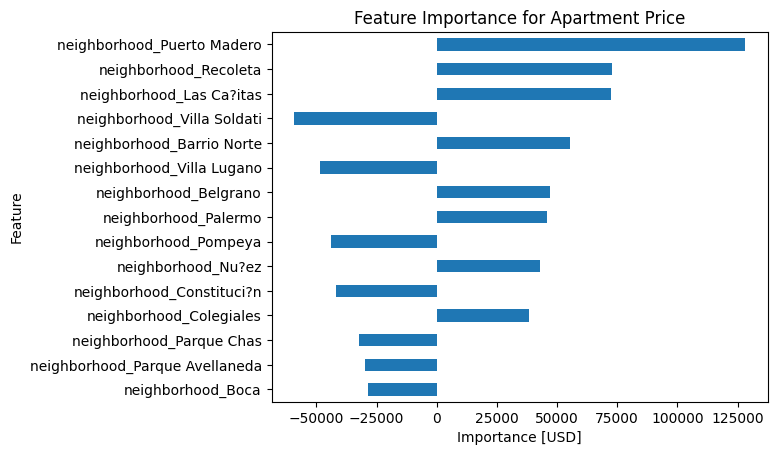

In [137]:
feat_imp.sort_values(key = abs).tail(15).plot(kind = "barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature")
plt.title("Feature Importance for Apartment Price")

# Tbd

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [ ]:
def wrangle(path):
    '''
    Read CSV file into DataFrame
    input -> file path
    output -> DataFrame
    '''
    df = pd.read_csv(path)

    # properties in Capital Federal
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    # property type = apartment
    mask_apt = df['property_type'] == 'apartment'
    # the cost should be less that $400000
    mask_price = df['price_aprox_usd'] < 400000

    df = df[mask_ba & mask_apt & mask_price]

    return df

In [ ]:
df = wrangle('https://query.data.world/s/wcjmr72sqh7nt5ln4b5he5trc4fnyo?dws=00000')

# https://query.data.world/s/bn6v7g3gnvmkid5tllq23eewqnwhrc?dws=00000

In [ ]:
df.shape

(2716, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2716 entries, 239 to 43951
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  2716 non-null   object 
 1   operation                   2716 non-null   object 
 2   property_type               2716 non-null   object 
 3   place_name                  2716 non-null   object 
 4   place_with_parent_names     2716 non-null   object 
 5   geonames_id                 2563 non-null   float64
 6   lat-lon                     2578 non-null   object 
 7   lat                         2578 non-null   float64
 8   lon                         2578 non-null   float64
 9   price                       2716 non-null   float64
 10  currency                    2716 non-null   object 
 11  price_aprox_local_currency  2716 non-null   float64
 12  price_aprox_usd             2716 non-null   float64
 13  surface_total_in_m2         2019 no

In [ ]:
df.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
239,2014-03-20,rent,apartment,Congreso,|Argentina|Capital Federal|Congreso|,3435259.0,NaN,NaN,NaN,2500.0,...,30.0,5.480667,83.333333,NaN,2.0,NaN,http://congreso.properati.com.ar/e1ru_alquiler...,Dto de 2AMB - Living - Dormitorio - Bao comple...,Dto de 2AMb,https://thumbs-cf.properati.com/0/SG4J769R2oc7...
245,2014-03-25,rent,apartment,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,3429760.0,"-34.6031851,-58.3635201",-34.603185,-58.363520,14000.0,...,70.0,13.153857,200.000000,NaN,NaN,NaN,http://puerto-madero.properati.com.ar/e3uq_alq...,CODIGO: ubicado en: Juana Manso 500 - Public...,Alquiler 2 ambientes - Juana Manso 500,https://thumbs-cf.properati.com/2/YKyTOjY-8MQA...
250,2014-03-25,rent,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,3430234.0,"-34.5860349,-58.4260851",-34.586035,-58.426085,6700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://palermo-soho.properati.com.ar/e4wb_alqu...,CODIGO: 2230-1 ubicado en: BORGES 2000 - Publ...,LOCAL EN ALQUILER VRIOS RUBROS,https://thumbs-cf.properati.com/4/R0M9MUdEe1Z-...
257,2014-03-25,rent,apartment,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,3429760.0,"-34.6121171,-58.3624709",-34.612117,-58.362471,7000.0,...,220.0,31.818182,31.818182,NaN,NaN,NaN,http://puerto-madero.properati.com.ar/e5ei_alq...,CODIGO: 808-18349 ubicado en: Azucena Villaflo...,TORRE EL FARO,https://thumbs-cf.properati.com/8/RPsd3o247OvN...
258,2014-03-25,rent,apartment,Caballito,|Argentina|Capital Federal|Caballito|,3435874.0,"-34.6225637,-58.4347611",-34.622564,-58.434761,3700.0,...,57.0,4.055667,64.912281,NaN,NaN,NaN,http://caballito.properati.com.ar/e5fa_alquile...,CODIGO: 612-001 ubicado en: José María Moreno ...,Alquiler 3 ambientes Caballito,https://thumbs-cf.properati.com/9/avEDq3bj9Tg8...
